# Module 2

###### Importing Libraries

In [45]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import datetime as dt
%matplotlib inline
sns.set(style='darkgrid')

###### Reading week2.csv file

In [46]:
stock_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/week2.csv")
stock_data.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,0,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,...,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
1,1,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,...,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,0.017442,Slight or No change
2,2,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,...,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.008996,Slight or No change
3,3,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,...,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-0.018972,Slight or No change
4,4,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,...,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,0.017925,Slight or No change


## Problem 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

In [47]:
stock_data['Date'].dtypes
### Data type of Date is Object

dtype('O')

In [48]:
# converting Date to datetime64 from object.
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
print(stock_data['Date'].dtype)

datetime64[ns]


In [49]:
# Removing the Unnamed column from the table
del stock_data['Unnamed: 0']
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,HINDUNILVR,EQ,2017-05-15,980.20,981.3,988.85,974.55,982.5,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
1,HINDUNILVR,EQ,2017-05-16,983.25,983.0,1002.50,982.05,999.5,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,0.017442,Slight or No change
2,HINDUNILVR,EQ,2017-05-17,1000.40,1004.0,1012.00,991.10,1009.0,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.008996,Slight or No change
3,HINDUNILVR,EQ,2017-05-18,1009.40,1008.0,1009.00,983.00,987.5,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-0.018972,Slight or No change
4,HINDUNILVR,EQ,2017-05-19,990.25,1000.0,1022.75,1000.00,1004.1,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,0.017925,Slight or No change


In [50]:
## Setting Index by the Date Column
stock_data.set_index(stock_data.Date, inplace = True)
stock_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,HINDUNILVR,EQ,2017-05-15,980.20,981.30,988.85,974.55,982.50,983.25,980.72,734446,7.202888e+08,32976,420159,57.21,5,2017,983.250000,0.000000,Slight or No change
2017-05-16,HINDUNILVR,EQ,2017-05-16,983.25,983.00,1002.50,982.05,999.50,1000.40,994.00,1503815,1.494798e+09,39717,669576,44.53,5,2017,994.772529,0.017442,Slight or No change
2017-05-17,HINDUNILVR,EQ,2017-05-17,1000.40,1004.00,1012.00,991.10,1009.00,1009.40,1003.84,1999387,2.007056e+09,63210,996054,49.82,5,2017,1001.673993,0.008996,Slight or No change
2017-05-18,HINDUNILVR,EQ,2017-05-18,1009.40,1008.00,1009.00,983.00,987.50,990.25,997.56,2690943,2.684374e+09,78098,983594,36.55,5,2017,997.237115,-0.018972,Slight or No change
2017-05-19,HINDUNILVR,EQ,2017-05-19,990.25,1000.00,1022.75,1000.00,1004.10,1008.00,1009.97,3059815,3.090316e+09,57429,1523108,49.78,5,2017,1000.534181,0.017925,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,HINDUNILVR,EQ,2019-05-07,1668.90,1678.80,1710.90,1672.50,1697.50,1697.50,1700.33,2212617,3.762183e+09,83971,1248858,56.44,5,2019,1493.746449,0.017137,Slight or No change
2019-05-08,HINDUNILVR,EQ,2019-05-08,1697.50,1697.50,1697.50,1675.00,1690.15,1688.70,1686.13,1243338,2.096428e+09,105328,849935,68.36,5,2019,1494.119209,-0.005184,Slight or No change
2019-05-09,HINDUNILVR,EQ,2019-05-09,1688.70,1680.10,1713.00,1677.00,1702.45,1703.75,1695.24,1204995,2.042757e+09,96629,821111,68.14,5,2019,1494.506954,0.008912,Slight or No change


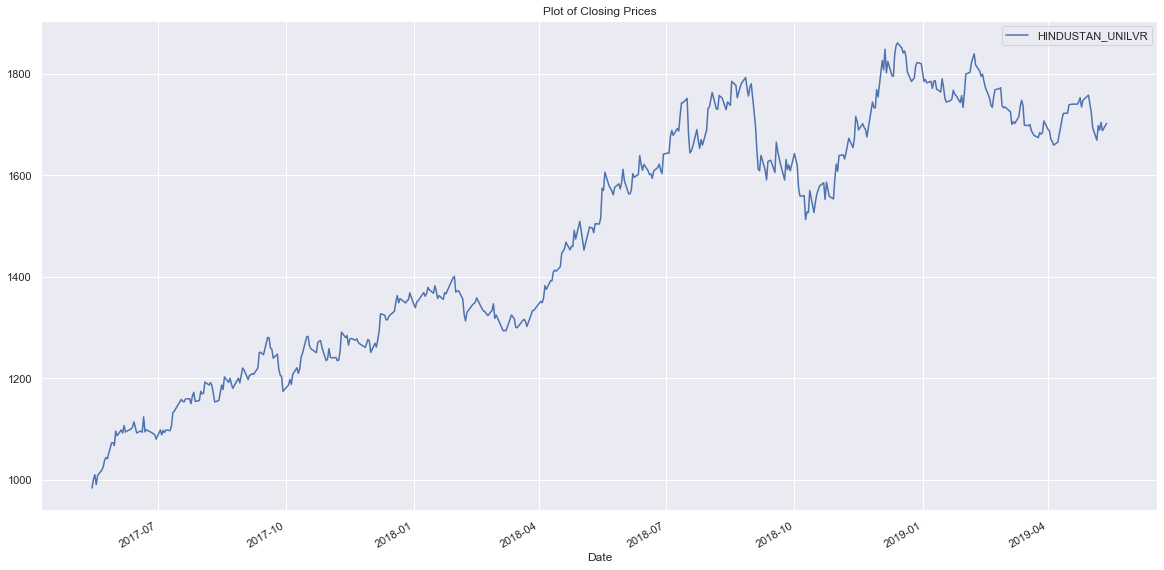

In [51]:
### Plotting Closing Price
stock_data['Close Price'].plot(label = 'HINDUSTAN_UNILVR',figsize=(20,10),title='Plot of Closing Prices')
plt.legend()

In [52]:
## Checking the top 5 Percentage Changes in the Daily Closing Prices for both positive and negative changes.
## Top Negative changes
stock_data['Day_Perc_Change'].sort_values().head()

Date
2018-09-03   -0.045503
2018-07-17   -0.039714
2018-10-09   -0.030077
2018-09-04   -0.028191
2018-10-04   -0.027736
Name: Day_Perc_Change, dtype: float64

##### News Reports on the fall of share prices of Hindustan Unilever on  the days with highest Daily Percentage Change in Prices.

2018-09-03:   <a href="https://economictimes.indiatimes.com/markets/stocks/news/stock-market-update-fmcg-stocks-under-pressure-hul-plunges-over-3/articleshow/65656180.cms?from=mdr">FMCG stocks under pressure; HUL plunges over 3%</a>

2018-07-17:   <a href="https://www.thehindubusinessline.com/markets/stock-markets/hul-posts-biggest-intraday-fall-in-11-weeks/article24440274.ece">HUL posts biggest intraday fall in 11 weeks</a>

2018-10-09:   <a href="https://www.financialexpress.com/market/share-market-live-updates-sensex-nifty-live-stocks-in-focus-rupee-vs-us-dollar-today-crude-oil-stock-tata-motors-market-live-today-9-october-2018-tuesday/1342512/">Sensex falls 175 pts, Nifty ends at 10,301 as INR hits record low; auto, FMCG stocks drag</a>

In [53]:
# Top Positive Changes
stock_data['Day_Perc_Change'].sort_values(ascending=False).head()

Date
2018-11-26    0.041132
2018-12-03    0.040821
2018-05-16    0.038667
2018-09-18    0.037061
2017-11-10    0.030130
Name: Day_Perc_Change, dtype: float64

##### News Reports on the rise of share prices of Hindustan Unilever on  the days with highest Daily Percentage Change in Prices.

2018-11-26:  <a href="https://www.livemint.com/Money/Dvr82L9rRyDGpXB1zQLruM/Sensex-Nifty-Live-Today-26-11-2018-share-market-oil-prices.html">Sensex, Nifty snap 3-day losing streak, rise 1%</a>

2018-12-03:  <a href="http://www.businessworld.in/article/GlaxoSmithKline-Consumer-Healthcare-Merges-With-Hindustan-Unilever-Limited/01-04-2020-187968/">GlaxoSmithKline Consumer Healthcare Merges With Hindustan Unilever Limited</a>

2018-05-16:  <a href="https://www.rediff.com/business/report/battle-of-the-giants-hul-beats-itc-in-both-volume-and-m-cap/20180521.htm">Battle of the giants: HUL beats ITC in both volume and M-cap</a>

## Problem 2.2
Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

<StemContainer object of 3 artists>

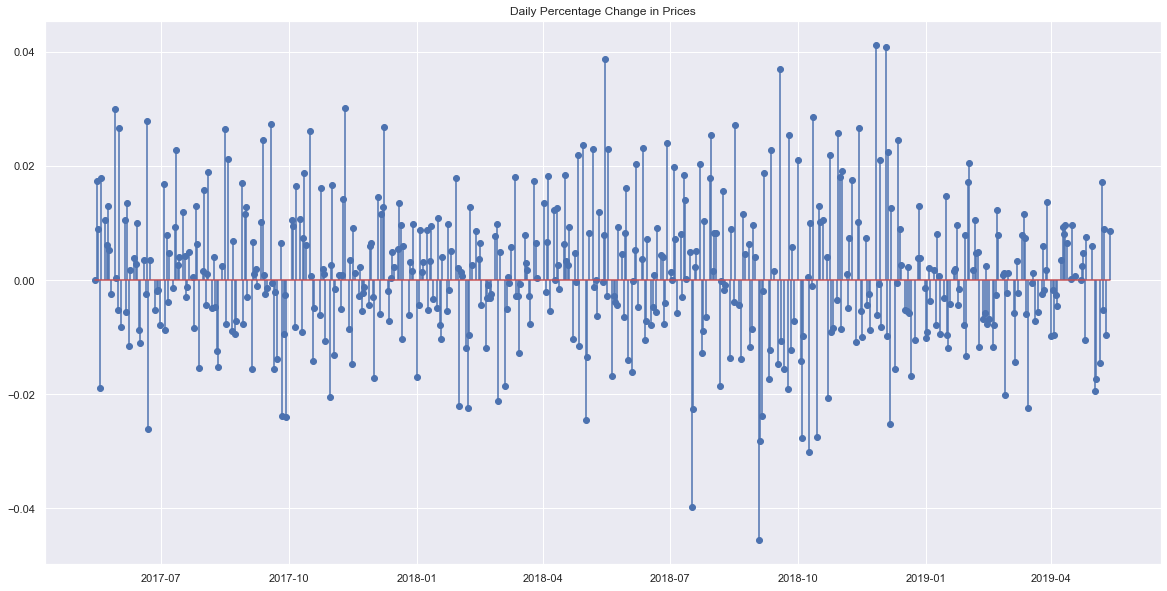

In [54]:
plt.figure(figsize=(20,10))
plt.title('Daily Percentage Change in Prices')
plt.stem(stock_data['Date'], stock_data['Day_Perc_Change'], use_line_collection=True)

# the stem plot clearly depicts the large changes that take place in prices on the dates mentioned in the previous pproblem.

###### Problem 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

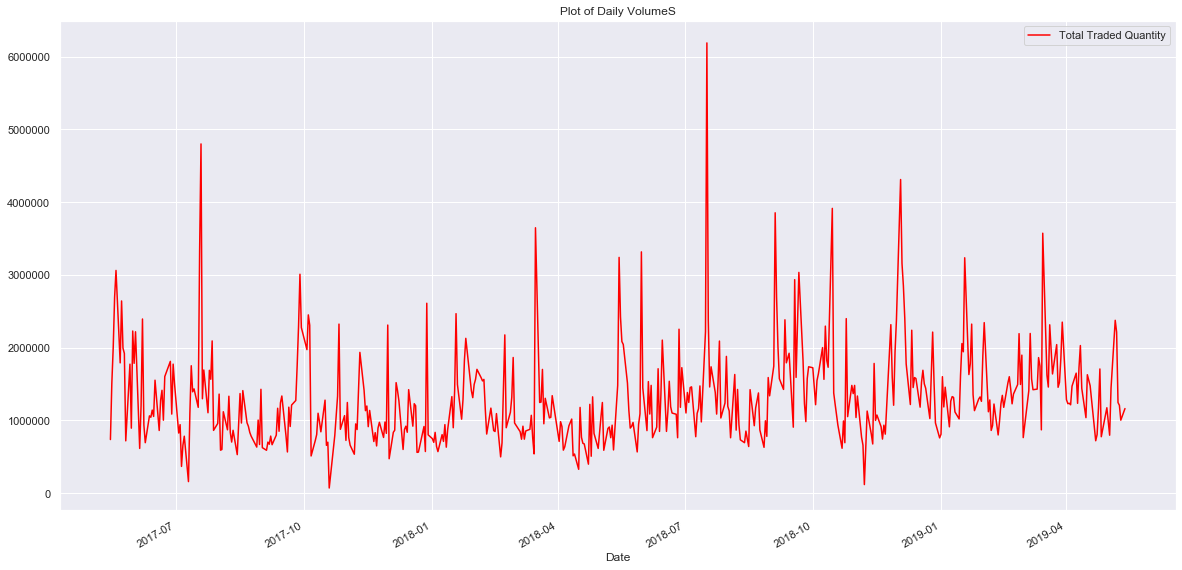

In [55]:
# Plotting Daily Volume
stock_data.plot('Date','Total Traded Quantity', figsize=(20,10),title='Plot of Daily VolumeS', color='Red')

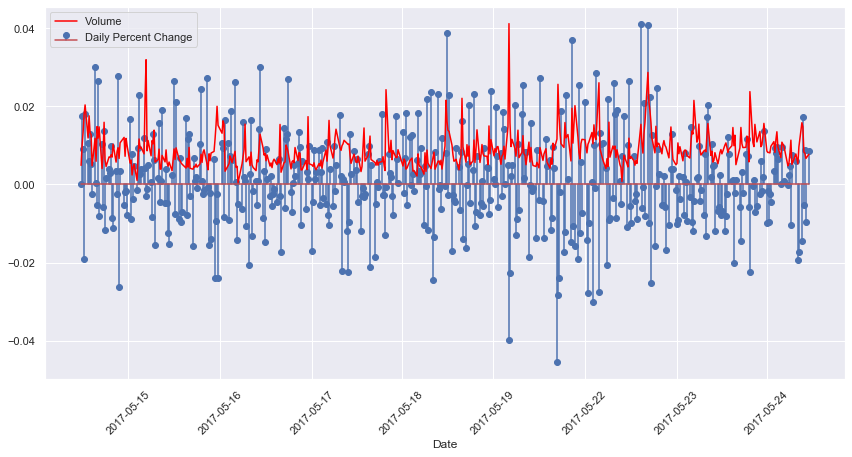

In [89]:
## Now we overlay the volume line plot over the stem plot of the daily percent price change.
## We do this we scaling down the data of volume to match daily_perc_change.
scaledvolume =  stock_data["Total Traded Quantity"]/stock_data["Total Traded Quantity"].max()
scaledvolume = scaledvolume * stock_data.Day_Perc_Change.max()


fig, ax = plt.subplots(figsize=(12, 6))

ax.stem(stock_data['Date'], stock_data['Day_Perc_Change'], label='Daily Percent Change')
ax.plot(stock_data['Date'],scaledvolume , label='Volume', color='Red')
ax.set_xlabel('Date')
plt.legend(loc=2)


plt.tight_layout() # otherwise the right y-label is slightly clipped
plt.xticks(plt.xticks()[0], stock_data.index.date, rotation=45)
plt.show()

Observations:
1. The majority of the peaks in the Total Traded Quatity has often coincided with the high daily percent changes in prices both positive and negative direction.
2. Spikes in the Total Traded Quanity is more prominent when the Daily Percent Change is closer to or exceeds ± 0.2 percent change in daily prices.

## Problem 2.4
Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [57]:
## counting the number of entries for each trend group. Lets count the Series column.
count_of_trend=stock_data.groupby(stock_data['Trend']).count()['Series']
count_of_trend

Trend
Slight or No change    494
Name: Series, dtype: int64

In [58]:
count_of_trend.index

Index(['Slight or No change'], dtype='object', name='Trend')

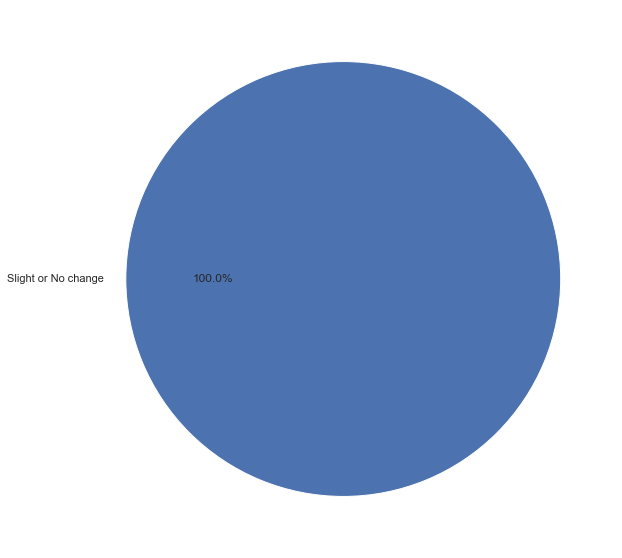

In [59]:
# # Since we have only 1 trend group, hence there will be only 1 colored pie chart
plt.figure(figsize=(20,10))
plt.pie(count_of_trend, labels=count_of_trend.index, autopct='%1.1f%%')
plt.show()


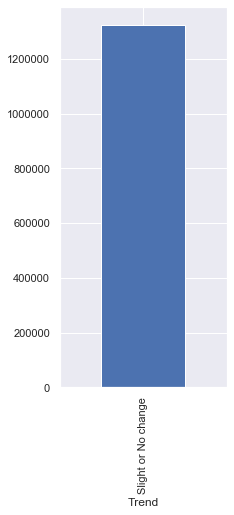

In [60]:
# We will find the average of each trend type
# Since we have only 1 trend group so we will get only 1 bar graph
volume_by_trend=stock_data.groupby('Trend')['Total Traded Quantity']

plt.figure(figsize=(3,7))
stock_data.groupby('Trend')['Total Traded Quantity'].mean().plot.bar()

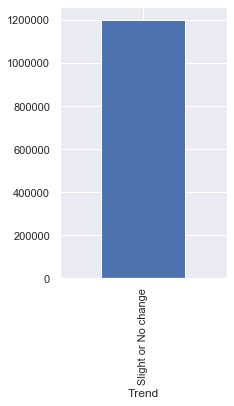

In [61]:
# We will find the median of each trend type
# Since we have only 1 trend group so we will get only 1 bar graph
plt.figure(figsize=(3,5))
stock_data.groupby('Trend')['Total Traded Quantity'].median().plot.bar()

## Problem 2.5
Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

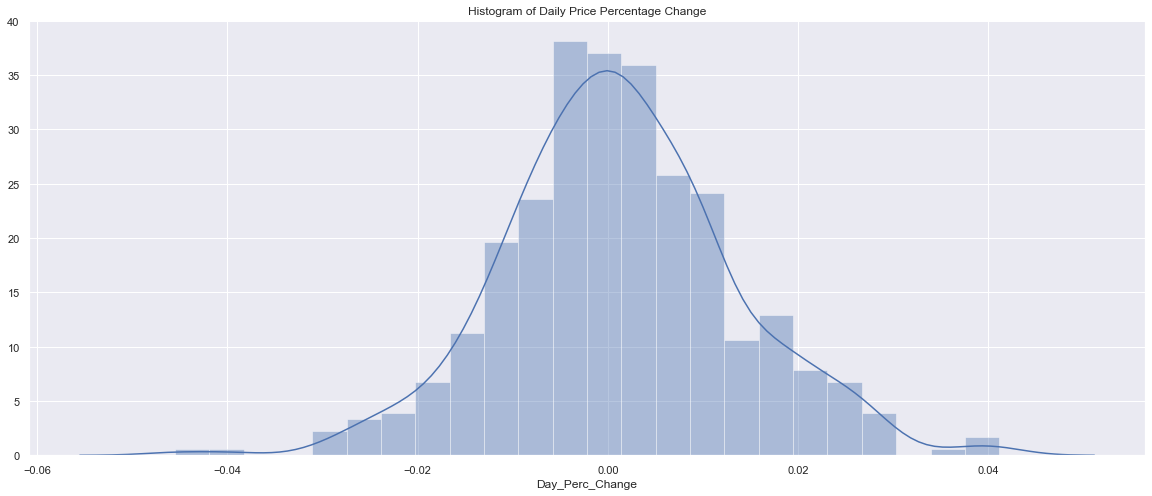

In [62]:
plt.figure(figsize=(20,8))
plt.title('Histogram of Daily Price Percentage Change')
sns.distplot(stock_data['Day_Perc_Change'])

## Problem 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column.

In [63]:
### Reading the 5 stocks.
adani = pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/ADANIPOWER.csv")
godrej = pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/GODREJIND.csv")
itc = pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/ITC.csv")
reliance = pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/RELIANCE.csv")
venkys = pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/VENKEYS.csv")

In [64]:
### Converting the datatype of their dates to datatime
adani['Date'] = pd.to_datetime(adani['Date'])
godrej['Date'] = pd.to_datetime(godrej['Date'])
itc['Date'] = pd.to_datetime(itc['Date'])
reliance['Date'] = pd.to_datetime(reliance['Date'])
venkys['Date'] = pd.to_datetime(venkys['Date'])

In [65]:
### Fiter out the non-EQ Series from the data
adani_data= adani[adani.Series=='EQ']
godrej_data = godrej[godrej.Series=='EQ']
itc_data = itc[itc.Series=='EQ']
reliance_data= reliance[reliance.Series=='EQ']
venkys_data = venkys[venkys.Series=='EQ']

In [66]:
### Lets create a new data frame "Five_stock_data" consiting only the closing prices of these 5 stocks with only EQ series

column_names =['Adani', 'Godrej', 'ITC', 'Reliance', 'Venkys']
Five_stock_data = pd.DataFrame(columns= column_names)


Five_stock_data['Adani']=adani_data['Close Price']
Five_stock_data['Godrej']=godrej_data['Close Price']
Five_stock_data['ITC']=itc_data['Close Price']
Five_stock_data['Reliance']=reliance_data['Close Price']
Five_stock_data["Venkys"]=venkys_data['Close Price']

Five_stock_data

,Adani,Godrej,ITC,Reliance,Venkys
0,30.25,578.55,277.95,1344.10,1169.70
1,32.85,584.80,283.45,1356.30,1177.00
2,33.10,588.60,281.65,1353.10,1188.00
3,31.90,574.60,277.90,1327.35,1156.90
4,32.40,578.00,286.20,1318.85,1161.65
...,...,...,...,...,...
489,41.50,484.30,304.25,1384.90,2000.45
490,41.35,476.10,307.00,1343.50,1956.70
491,40.95,471.30,301.90,1299.45,1930.10
492,41.45,471.20,300.65,1256.45,1820.65


In [67]:
## Setting the index to date. Using the common date column from adani_data
Five_stock_data.set_index(adani_data['Date'], inplace=True)
Five_stock_data

,Adani,Godrej,ITC,Reliance,Venkys
Date,,,,,
2017-05-15,30.25,578.55,277.95,1344.10,1169.70
2017-05-16,32.85,584.80,283.45,1356.30,1177.00
2017-05-17,33.10,588.60,281.65,1353.10,1188.00
2017-05-18,31.90,574.60,277.90,1327.35,1156.90
2017-05-19,32.40,578.00,286.20,1318.85,1161.65
...,...,...,...,...,...
2019-05-07,41.50,484.30,304.25,1384.90,2000.45
2019-05-08,41.35,476.10,307.00,1343.50,1956.70
2019-05-09,40.95,471.30,301.90,1299.45,1930.10


In [68]:
### Create new data frame consisting of the daily percent in prices.
## We drop te NaN values
Five_stock_data_pct= Five_stock_data.pct_change().dropna()
Five_stock_data_pct

,Adani,Godrej,ITC,Reliance,Venkys
Date,,,,,
2017-05-16,0.085950,0.010803,0.019788,0.009077,0.006241
2017-05-17,0.007610,0.006498,-0.006350,-0.002359,0.009346
2017-05-18,-0.036254,-0.023785,-0.013314,-0.019030,-0.026178
2017-05-19,0.015674,0.005917,0.029867,-0.006404,0.004106
2017-05-22,-0.029321,-0.020848,0.060797,0.004019,0.049972
...,...,...,...,...,...
2019-05-07,-0.030374,-0.039373,-0.002459,-0.017000,-0.007172
2019-05-08,-0.003614,-0.016932,0.009039,-0.029894,-0.021870
2019-05-09,-0.009674,-0.010082,-0.016612,-0.032787,-0.013594


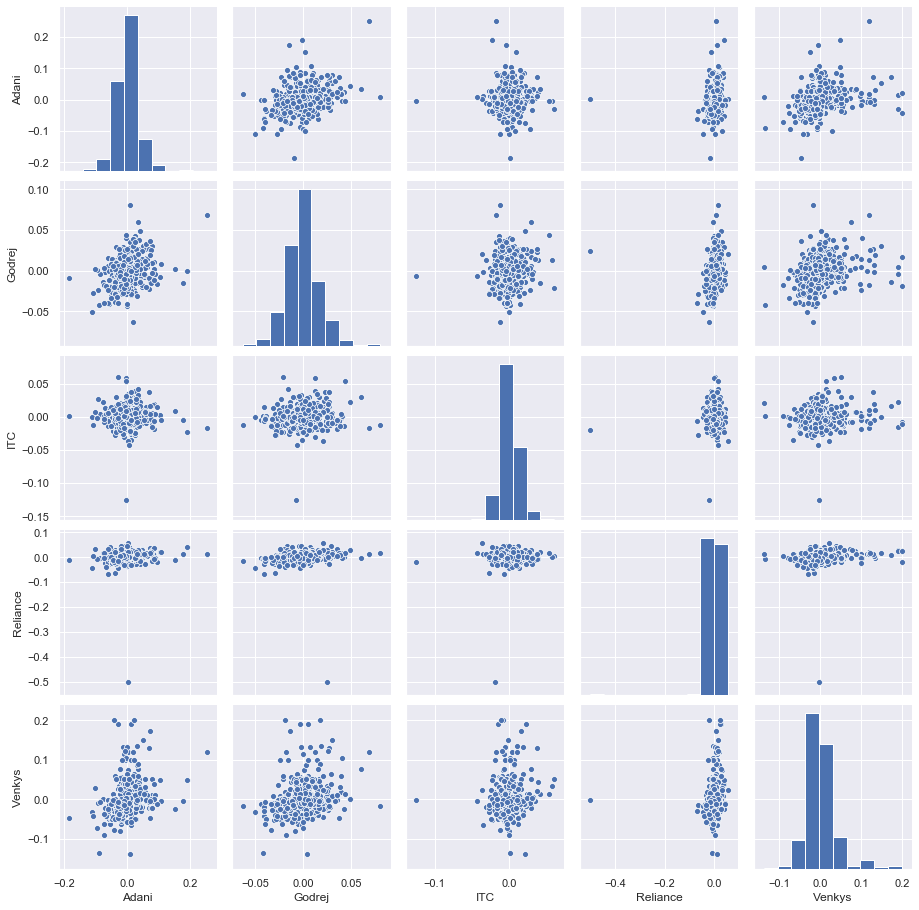

In [69]:
## Analysing the correlation between the change in daily percentage of the five stocks.
sns.pairplot(Five_stock_data_pct)

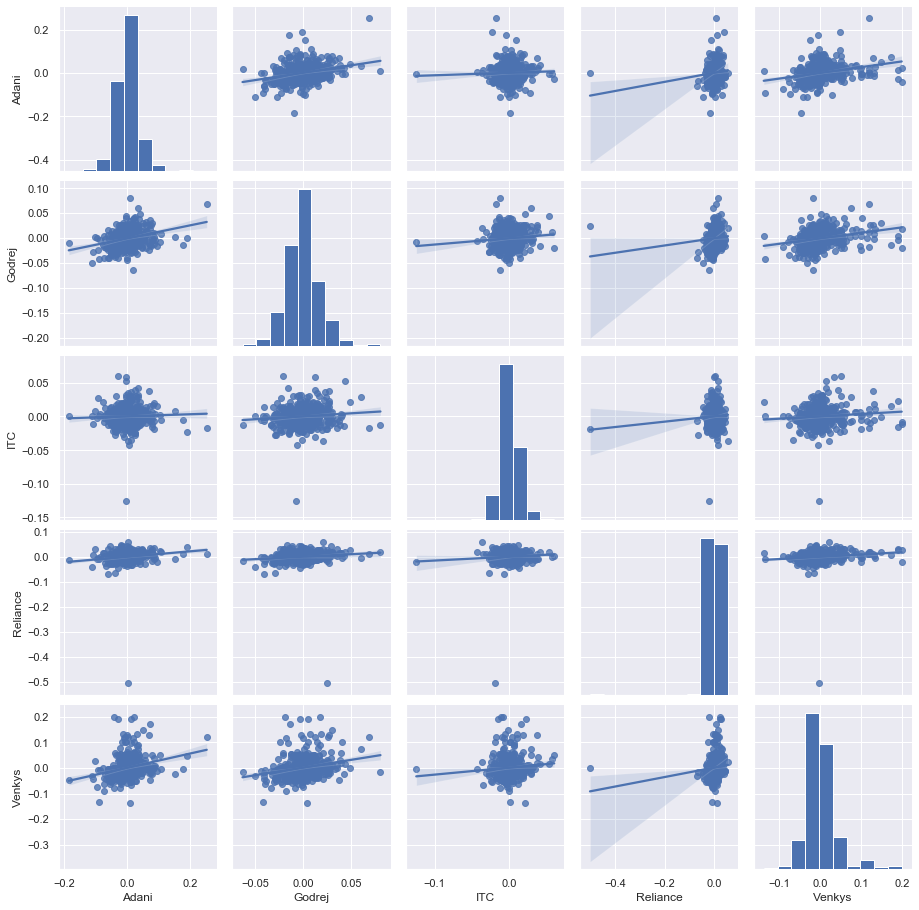

In [70]:
#### We draw a regresion line to have an idea about correlation the slop of the scatter plot
sns.pairplot(Five_stock_data_pct, kind='reg')

## Problem 2.7 
Volatility is the change in variance in the returns of a stock over a specific period of time.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [71]:
## A rolling average can help us find trends that would otherwise be hard to detect.
## Lets consider the stocks of ITC
## 1st calculate the 7 days rolling avg of the daily percentage changes.
ITC_roll_avg = Five_stock_data_pct['ITC'].rolling(7).mean()
ITC_roll_avg

Date
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
                ...   
2019-05-07    0.001187
2019-05-08    0.001721
2019-05-09   -0.002088
2019-05-10   -0.001608
2019-05-13   -0.002176
Name: ITC, Length: 493, dtype: float64

In [72]:
## Now we compute the standard deviation of the 7 days rolling 
ITC_roll_std=Five_stock_data_pct['ITC'].rolling(7).std()
ITC_roll_std

Date
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
                ...   
2019-05-07    0.008568
2019-05-08    0.008974
2019-05-09    0.010395
2019-05-10    0.010178
2019-05-13    0.010099
Name: ITC, Length: 493, dtype: float64

In [73]:
## Now we calculate the Volatility
# Volatility is the product of standard deviation for a period and the square root of the length of the period
## Hence, volatility = rolling(N).std() * sqrt(N)
volatility_ITC= ITC_roll_std*np.sqrt(7)
volatility_ITC

Date
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
                ...   
2019-05-07    0.022670
2019-05-08    0.023744
2019-05-09    0.027503
2019-05-10    0.026930
2019-05-13    0.026719
Name: ITC, Length: 493, dtype: float64

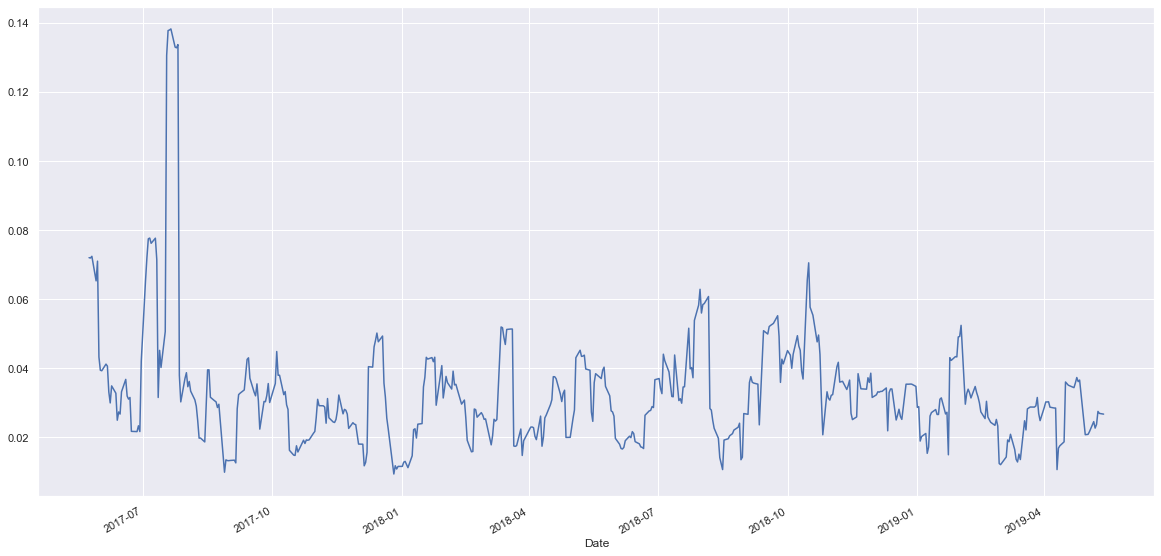

In [74]:
## Plotting volatility of ITC
plt.figure(figsize=(20,10))
volatility_ITC.plot()

## Problem 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [75]:
# reading csv
Nifty_data=pd.read_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/Nifty50.csv")
Nifty_data.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [76]:
# Date type conversion
Nifty_data['Date']= pd.to_datetime(Nifty_data['Date'])

In [77]:
## setting date as the index
Nifty_data.set_index(Nifty_data['Date'], inplace=True)

In [78]:
## Calculating daily percent change
Nifty_data_pct=Nifty_data['Close'].pct_change().dropna()
Nifty_data_pct

Date
2017-05-16    0.007078
2017-05-17    0.001419
2017-05-18   -0.010109
2017-05-19   -0.000164
2017-05-22    0.001098
                ...   
2019-05-07   -0.008652
2019-05-08   -0.012041
2019-05-09   -0.005075
2019-05-10   -0.002026
2019-05-13   -0.011588
Name: Close, Length: 493, dtype: float64

In [79]:
## Calculating the volatility for Nifty by rolling for 7 days
## Volatility for a rolling period of N days is the product od the standard deviation of the percentchange in prices for Ndays and the √N
volatility_Nifty= Nifty_data_pct.rolling(7).std()*np.sqrt(7)
volatility_Nifty

Date
2017-05-16         NaN
2017-05-17         NaN
2017-05-18         NaN
2017-05-19         NaN
2017-05-22         NaN
                ...   
2019-05-07    0.017630
2019-05-08    0.019601
2019-05-09    0.012183
2019-05-10    0.011545
2019-05-13    0.011838
Name: Close, Length: 493, dtype: float64

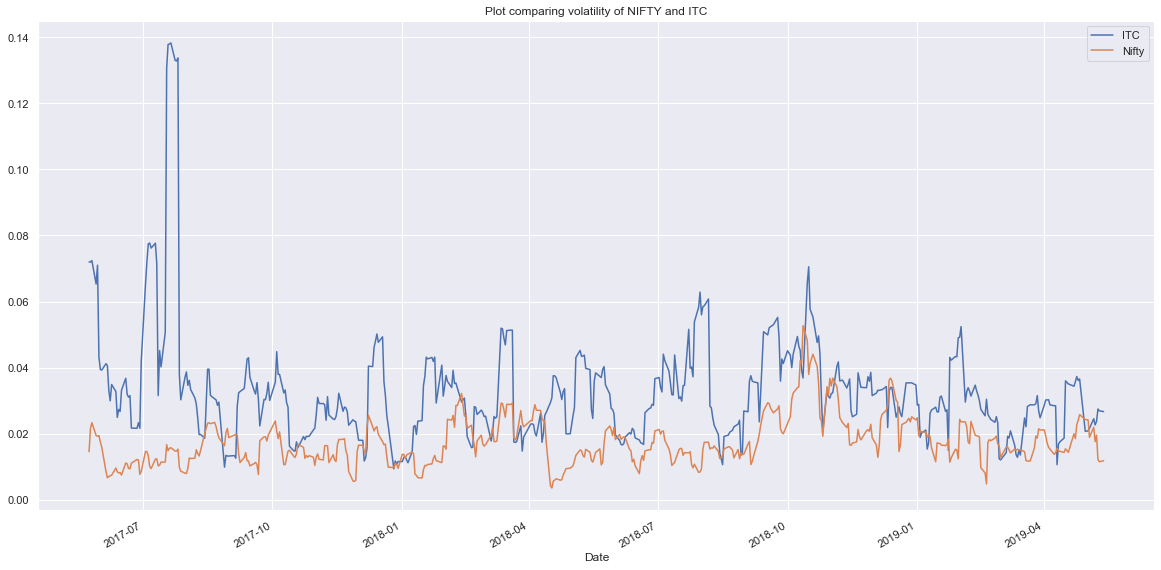

In [80]:
# Npw we compare the volatility of Nifty with the volatility of ITC that we calculated before by plotting them.
plt.figure(figsize=(20,10))
volatility_ITC.plot(label='ITC')
volatility_Nifty.plot(label='Nifty')
plt.title("Plot comparing volatility of NIFTY and ITC")
plt.legend()

## Problem 2.9
Plot the 21 day and 34 day Moving average with the average price and decide a Call!

Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

In [81]:
### Lets create a dataframe of 21 and 34 days moving averages of average price.
x = ['21_days_roll','34_days_roll']
Moving_Avg_df=pd.DataFrame(columns= x)

Moving_Avg_df['21_days_roll']= stock_data['Average Price'].rolling(21).mean()
Moving_Avg_df['34_days_roll']= stock_data['Average Price'].rolling(34).mean()
Moving_Avg_df['Close Price']= stock_data['Close Price']
Moving_Avg_df

,21_days_roll,34_days_roll,Close Price
Date,,,
2017-05-15,NaN,NaN,983.25
2017-05-16,NaN,NaN,1000.40
2017-05-17,NaN,NaN,1009.40
2017-05-18,NaN,NaN,990.25
2017-05-19,NaN,NaN,1008.00
...,...,...,...
2019-05-07,1711.372381,1705.598529,1697.50
2019-05-08,1711.783810,1704.124412,1688.70
2019-05-09,1712.916190,1703.924412,1703.75


Text(0.5, 1.0, 'Plot of 21 days and 24 days Moving Average')

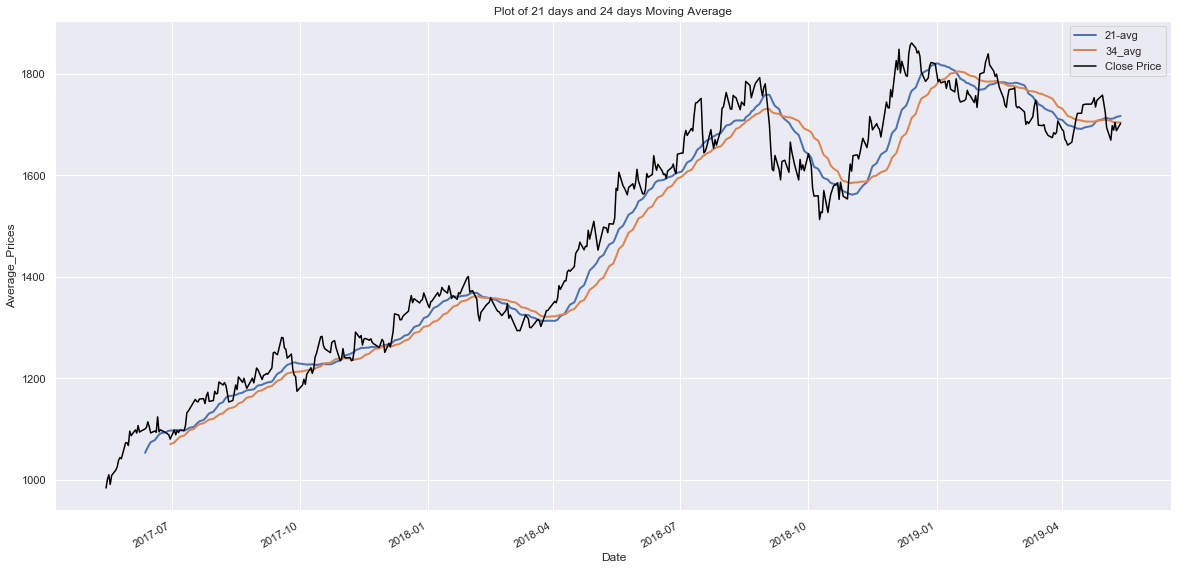

In [82]:
## plotting the dataframe
plt.figure(figsize=(20,10))
Moving_Avg_df['21_days_roll'].plot(label='21-avg', lw=2)
Moving_Avg_df["34_days_roll"].plot(label='34_avg',lw=2)
Moving_Avg_df['Close Price'].plot(label='Close Price', color='black')
plt.ylabel("Average_Prices")
plt.legend()
plt.title('Plot of 21 days and 24 days Moving Average')

In [83]:
### Condition for Buy or Sell prompt
Moving_Avg_df['prompt']= np.where(Moving_Avg_df['21_days_roll'] > Moving_Avg_df['34_days_roll'], 1.0,0.0)

### Using the above condition to assign value to intersecting points 
Moving_Avg_df['Position']= Moving_Avg_df['prompt'].diff()

Moving_Avg_df

,21_days_roll,34_days_roll,Close Price,prompt,Position
Date,,,,,
2017-05-15,NaN,NaN,983.25,0.0,NaN
2017-05-16,NaN,NaN,1000.40,0.0,0.0
2017-05-17,NaN,NaN,1009.40,0.0,0.0
2017-05-18,NaN,NaN,990.25,0.0,0.0
2017-05-19,NaN,NaN,1008.00,0.0,0.0
...,...,...,...,...,...
2019-05-07,1711.372381,1705.598529,1697.50,1.0,0.0
2019-05-08,1711.783810,1704.124412,1688.70,1.0,0.0
2019-05-09,1712.916190,1703.924412,1703.75,1.0,0.0


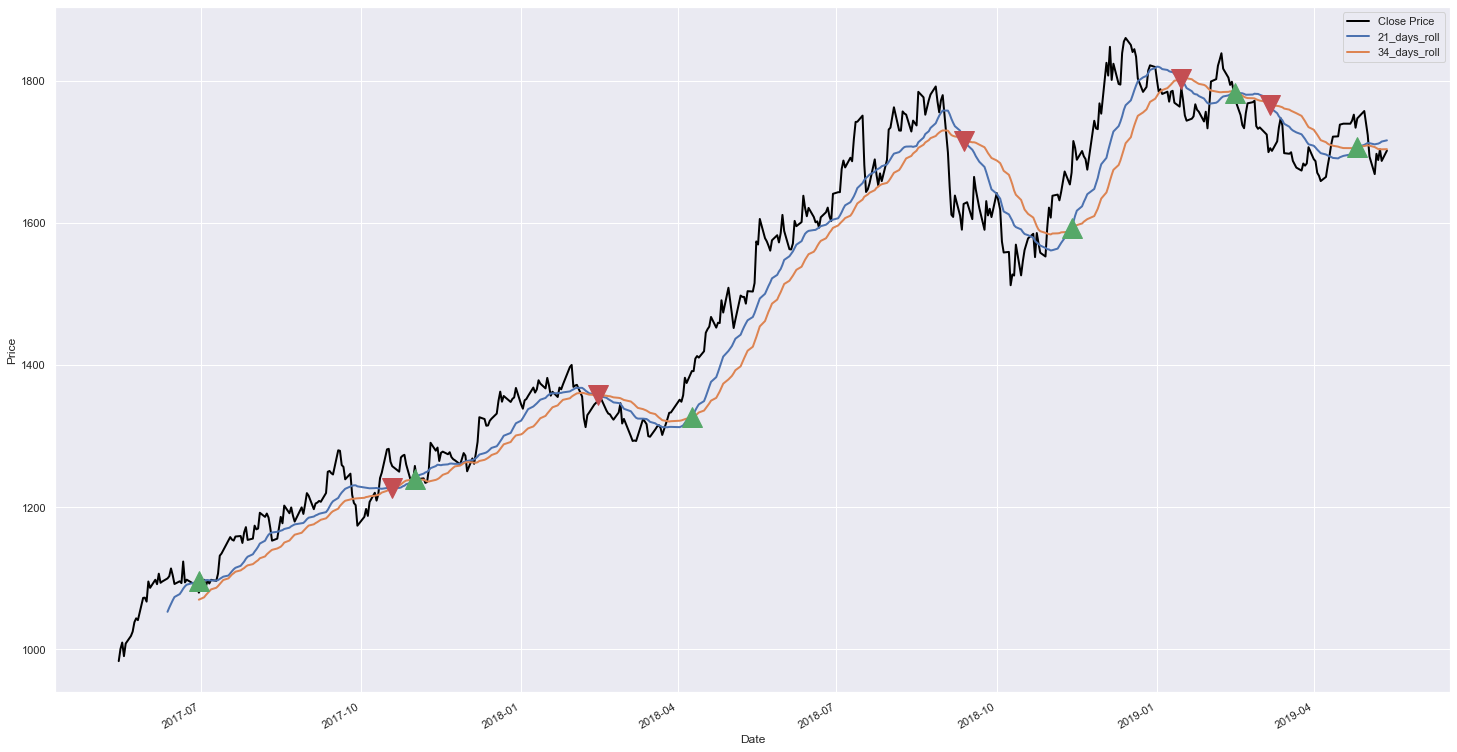

In [84]:
fig = plt.figure(figsize=(25,14))


ax1 = fig.add_subplot(111, ylabel='Price')


Moving_Avg_df['Close Price'].plot(ax=ax1, color='black', lw=2, label='Close Price')
Moving_Avg_df[['21_days_roll', '34_days_roll']].plot(ax=ax1, lw=2)


ax1.plot(Moving_Avg_df['21_days_roll'][Moving_Avg_df['Position'] == 1.0].index, Moving_Avg_df['21_days_roll'][Moving_Avg_df.Position == 1.0], '^' , markersize=20,color='g')
ax1.plot(Moving_Avg_df['21_days_roll'][Moving_Avg_df['Position'] == -1.0].index, Moving_Avg_df['21_days_roll'][Moving_Avg_df.Position == -1.0], 'v' , markersize=20,color='r')

plt.legend()

## Problem 2.10
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average

The bollinger bands comprise the following data points:

The 14 day rolling mean of the closing price (we call it the average)
Upper band which is the rolling mean + 2 standard deviations away from the average.
Lower band which is the rolling mean - 2 standard deviations away from the average.
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.

Save to a new csv file.

In [85]:
# creating new columns
stock_data["14_day_avg"] = stock_data['Close Price'].rolling(14).mean()
stock_data["14_day_std"] = stock_data['Close Price'].rolling(14).std()
stock_data["14_day_upper_band"] = stock_data["14_day_avg"] + (stock_data["14_day_std"] * 2)
stock_data["14_day_lower_band"] = stock_data["14_day_avg"] - (stock_data["14_day_std"] * 2)

Text(0.5, 1.0, 'Plot of Bollinger Bands with 14 days rolling')

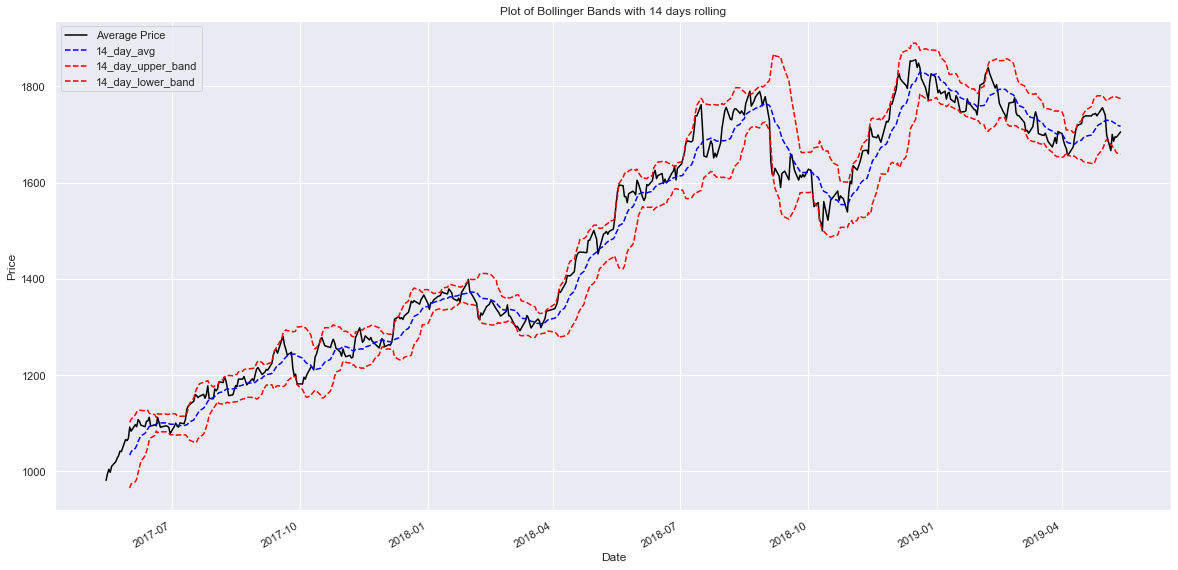

In [86]:
plt.figure(figsize=(20,10))
ax1 = plt.gca(ylabel='Price')

stock_data.plot(kind='line',x='Date', y='Average Price', ax=ax1, color='black')
stock_data.plot(kind='line',x='Date', y='14_day_avg',    ax=ax1, color='blue', linestyle='--')
stock_data.plot(kind='line',x='Date', y='14_day_upper_band',    ax=ax1, color='red', linestyle='--')
stock_data.plot(kind='line',x='Date', y='14_day_lower_band',    ax=ax1, color='red', linestyle='--')

plt.title("Plot of Bollinger Bands with 14 days rolling")


Observation:
It is observed that the actual daily average prices are within the limits set by the bollinger bands.
Its is also observed that the width of the bollinger band increases with the increase in price volatility and  majority of the width increase in the bands are consistent with both buy or sell signals.

In [87]:
stock_data.to_csv("C:/Users/Lenovo/Desktop/ML INTERNSHIP/week3.csv")